In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the data


In [2]:
df = pd.read_csv("Synthetic Data Water Quality 10000 and 17F.csv")

In [3]:
df.isnull().sum()

Colour (TCU)                              3104
Turbidity (NTU)                           3104
pH                                        3104
Conductivity (uS/cm)                      3104
Total Dissolved Solids (mg/l)             3104
Total Hardness (mg/l as CaCO3)            3104
Aluminium (mg/l)                          3104
Chloride (mg/l)                           3104
Total Iron (mg/l)                         3104
Sodium (mg/l)                             3104
Sulphate (mg/l)                           3104
Biochemical oxygen demand/Zinc  (mg/l)    3104
Magnesium (mg/l)                          3104
Calcium (mg/l)                            3104
Potassium (mg/l)                          3104
Total Organic Carban (mg/l)               3104
Nitrate (mg/l)                            3104
Phosphate (mg/l)                          3104
Potability                                3104
MIN                                       3104
dtype: int64

### Data Preprocessing


In [4]:
df.dropna(inplace=True)

In [5]:
del df["MIN"]

In [6]:
df["Potability"] = df["Potability"].map({"non-potable": 0, "potable": 1})

In [7]:
df.describe()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Biochemical oxygen demand/Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Total Organic Carban (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.006526,5.003388,7.337763,1502.148272,1001.183584,300.613398,0.200808,249.491721,0.300165,200.793553,402.124054,5.004608,100.026299,149.944522,49.838229,14.281623,45.162176,2.205561,0.500000
std,8.717615,2.906118,3.101412,869.812955,578.522848,171.478482,0.115359,144.526095,0.174572,116.039382,230.187867,2.897890,57.979525,87.162086,28.795520,3.309409,25.861234,1.274395,0.500025
min,0.010000,0.000000,0.000000,0.120000,0.050000,0.030000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,0.030000,0.020000,0.000000,2.200000,0.030000,0.000000,0.000000
25%,7.517500,2.490000,6.397500,741.635000,494.590000,154.980000,0.100000,122.707500,0.150000,99.890000,205.910000,2.460000,49.362500,74.417500,24.490000,12.062534,23.150000,1.090000,0.000000
50%,15.000000,5.000000,7.470000,1500.095000,1000.030000,300.005000,0.200000,249.915000,0.300000,199.995000,400.125000,5.000000,100.015000,150.010000,49.990000,14.216595,45.010000,2.200000,0.500000
75%,22.660000,7.530000,8.480000,2259.740000,1497.880000,448.605000,0.300000,374.760000,0.450000,303.645000,601.925000,7.500000,150.130000,226.245000,75.040000,16.557652,67.772500,3.320000,1.000000
max,30.000000,10.000000,14.000000,2999.910000,1999.960000,599.970000,0.400000,499.870000,0.600000,399.980000,799.880000,10.000000,199.980000,299.970000,100.000000,28.300000,90.000000,4.400000,1.000000


In [8]:
df.head(10)

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Biochemical oxygen demand/Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Total Organic Carban (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,10.379783,22.23,0.41,1
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,15.180013,16.06,0.68,1
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,16.868637,19.81,0.91,1
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,18.436525,42.82,0.02,1
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,11.558279,14.35,2.08,1
5,1.84,3.58,7.04,12.63,647.39,245.29,0.04,44.71,0.13,86.00,309.70,1.22,96.65,136.71,46.42,8.399735,15.89,0.47,1
6,1.36,0.78,6.92,1266.78,138.36,149.25,0.13,206.45,0.19,150.09,43.26,3.13,54.01,31.84,27.01,13.789695,2.29,1.54,1
7,2.67,1.03,7.46,596.34,82.20,267.11,0.18,96.54,0.06,183.68,3.13,3.40,89.20,54.77,39.22,12.363817,0.12,1.28,1
8,3.40,1.46,7.29,663.65,908.88,80.87,0.19,179.05,0.28,190.12,275.67,2.27,65.64,105.11,11.08,12.706049,41.31,0.88,1
9,5.63,4.07,8.41,350.84,700.23,213.44,0.11,225.84,0.02,47.64,157.70,2.13,57.10,62.28,49.89,17.927806,32.08,0.87,1


## Data Visualisation


In [9]:
parameters = df.columns
parameters

Index(['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)',
       'Biochemical oxygen demand/Zinc  (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Total Organic Carban (mg/l)',
       'Nitrate (mg/l)', 'Phosphate (mg/l)', 'Potability'],
      dtype='object')

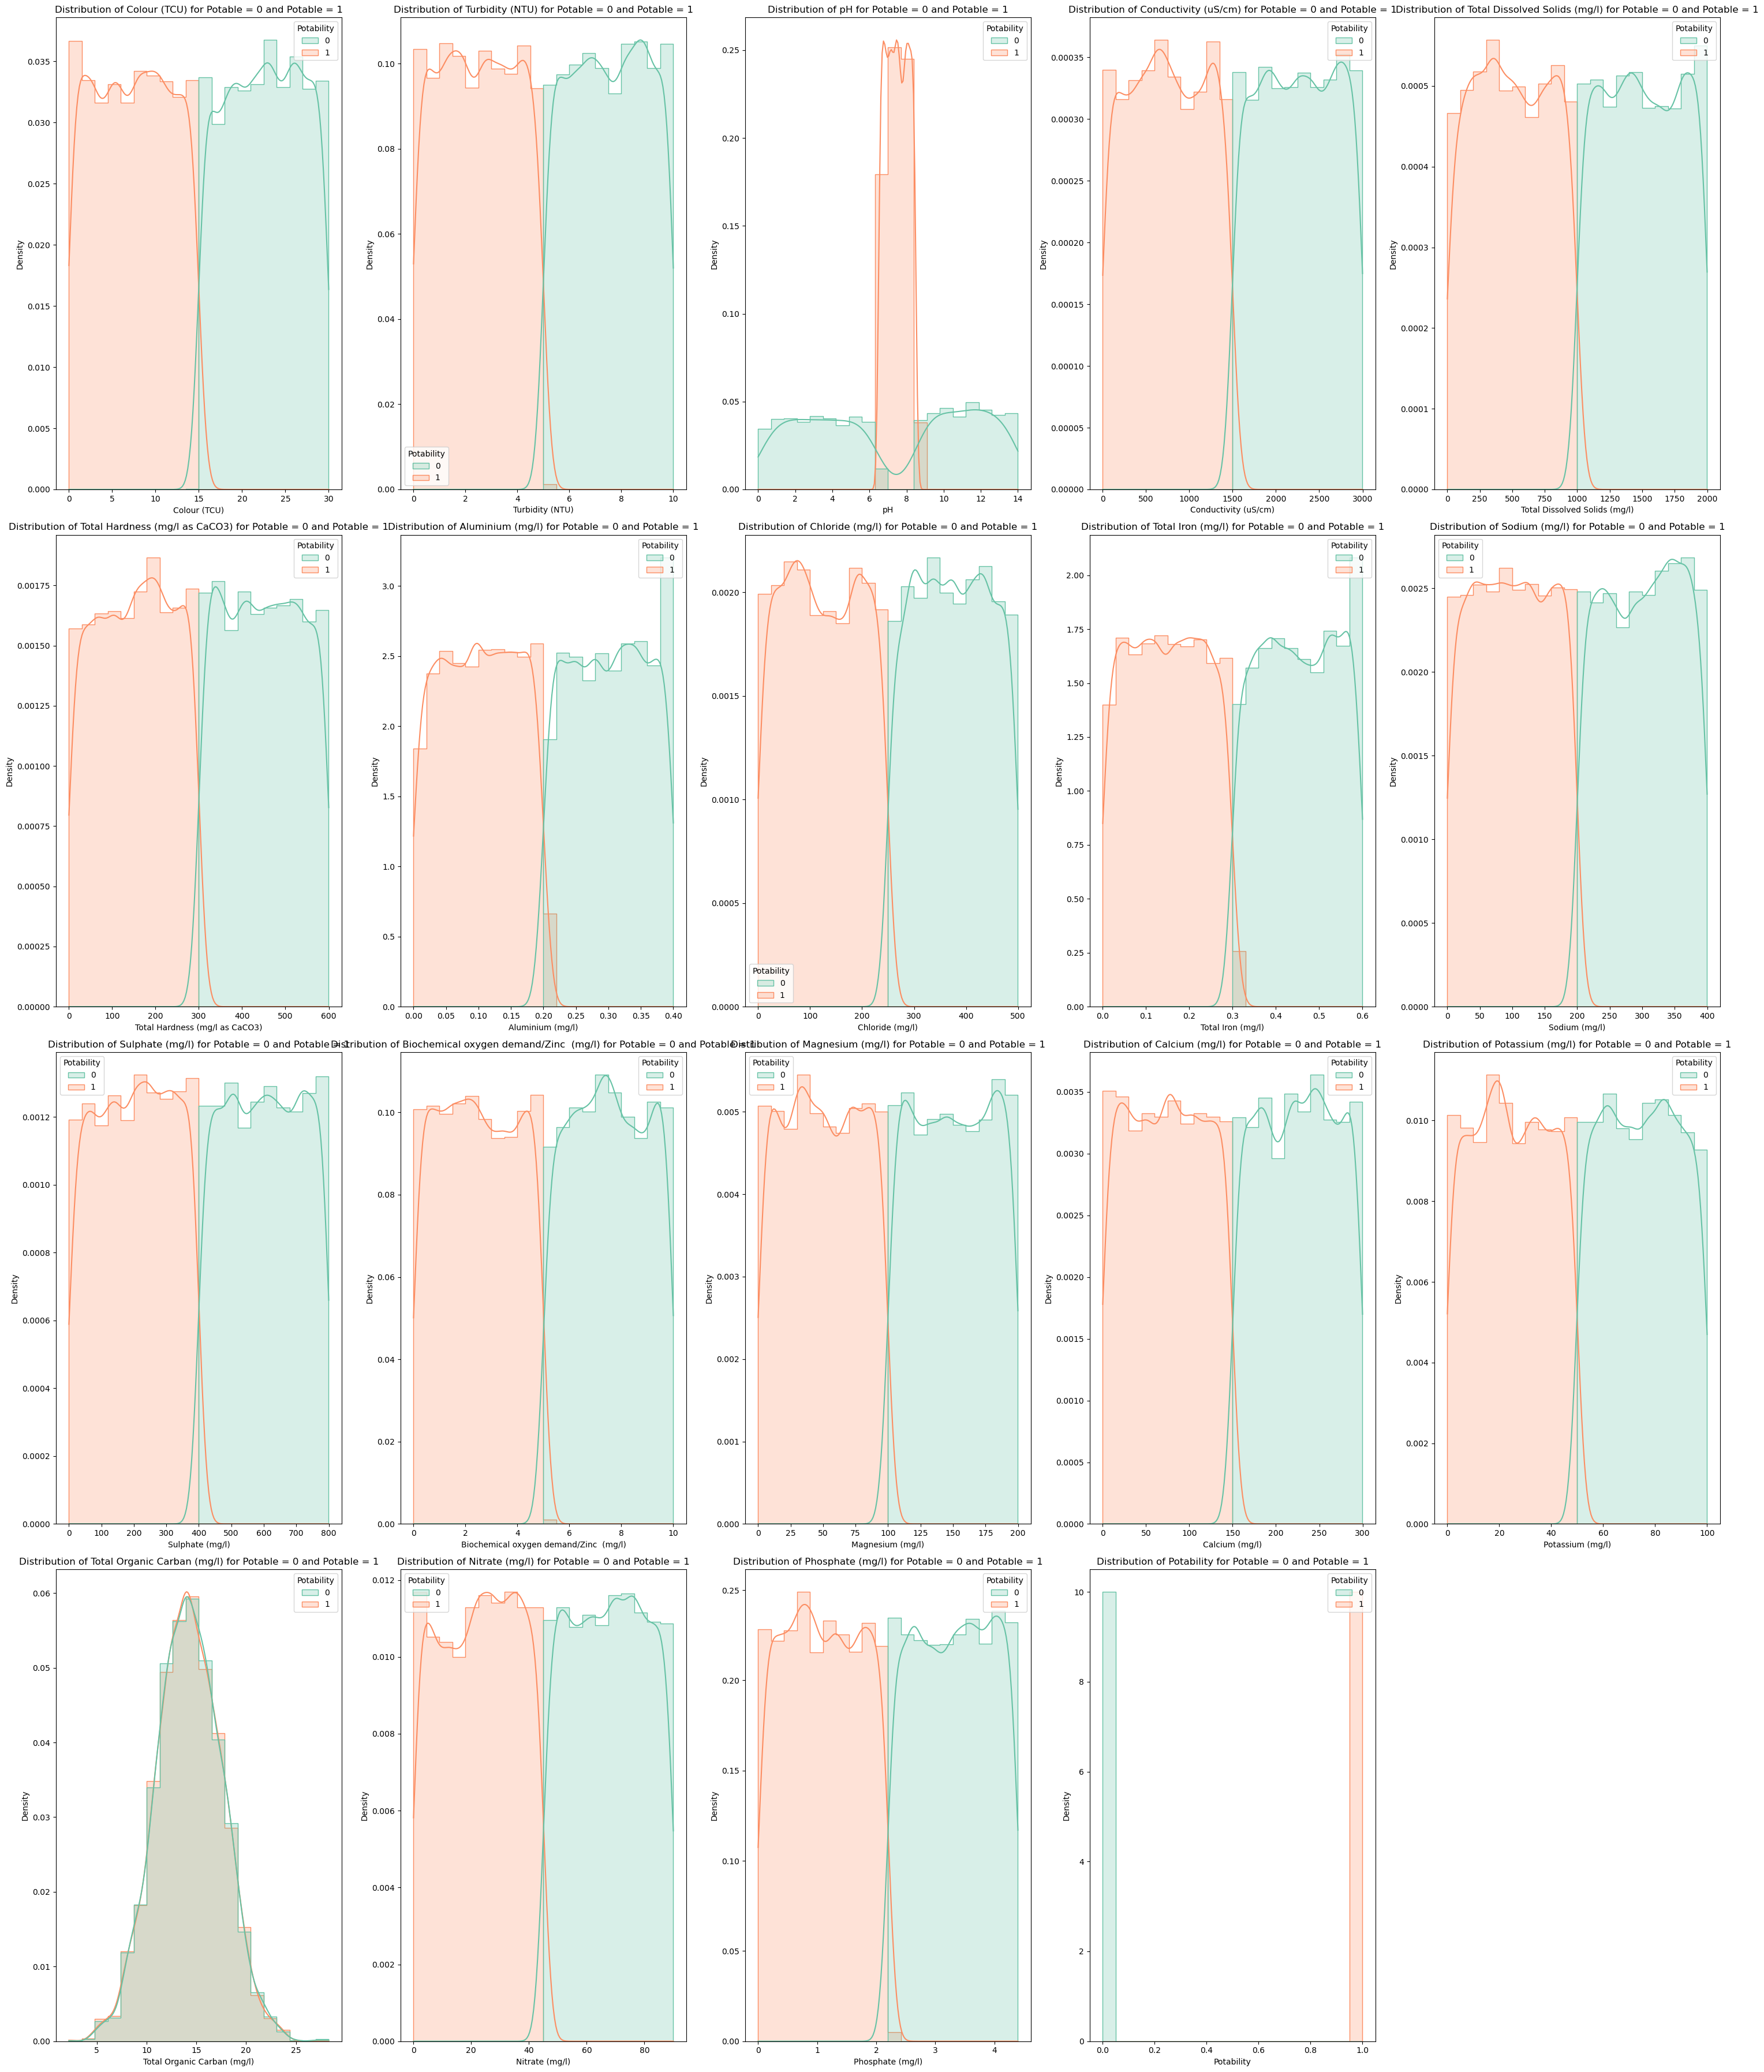

In [10]:
plt.figure(figsize=(30, 36))

for i, param in enumerate(parameters, 1):
    plt.subplot(4, 5, i)
    sns.histplot(
        data=df,
        x=param,
        hue="Potability",
        kde=True,
        palette="Set2",
        bins=20,
        element="step",
        stat="density",
    )
    plt.title(f"Distribution of {param} for Potable = 0 and Potable = 1")
    plt.xlabel(param)
    plt.ylabel("Density")
plt.tight_layout()

Text(0.5, 0.98, 'Histograms for Each Parameter')

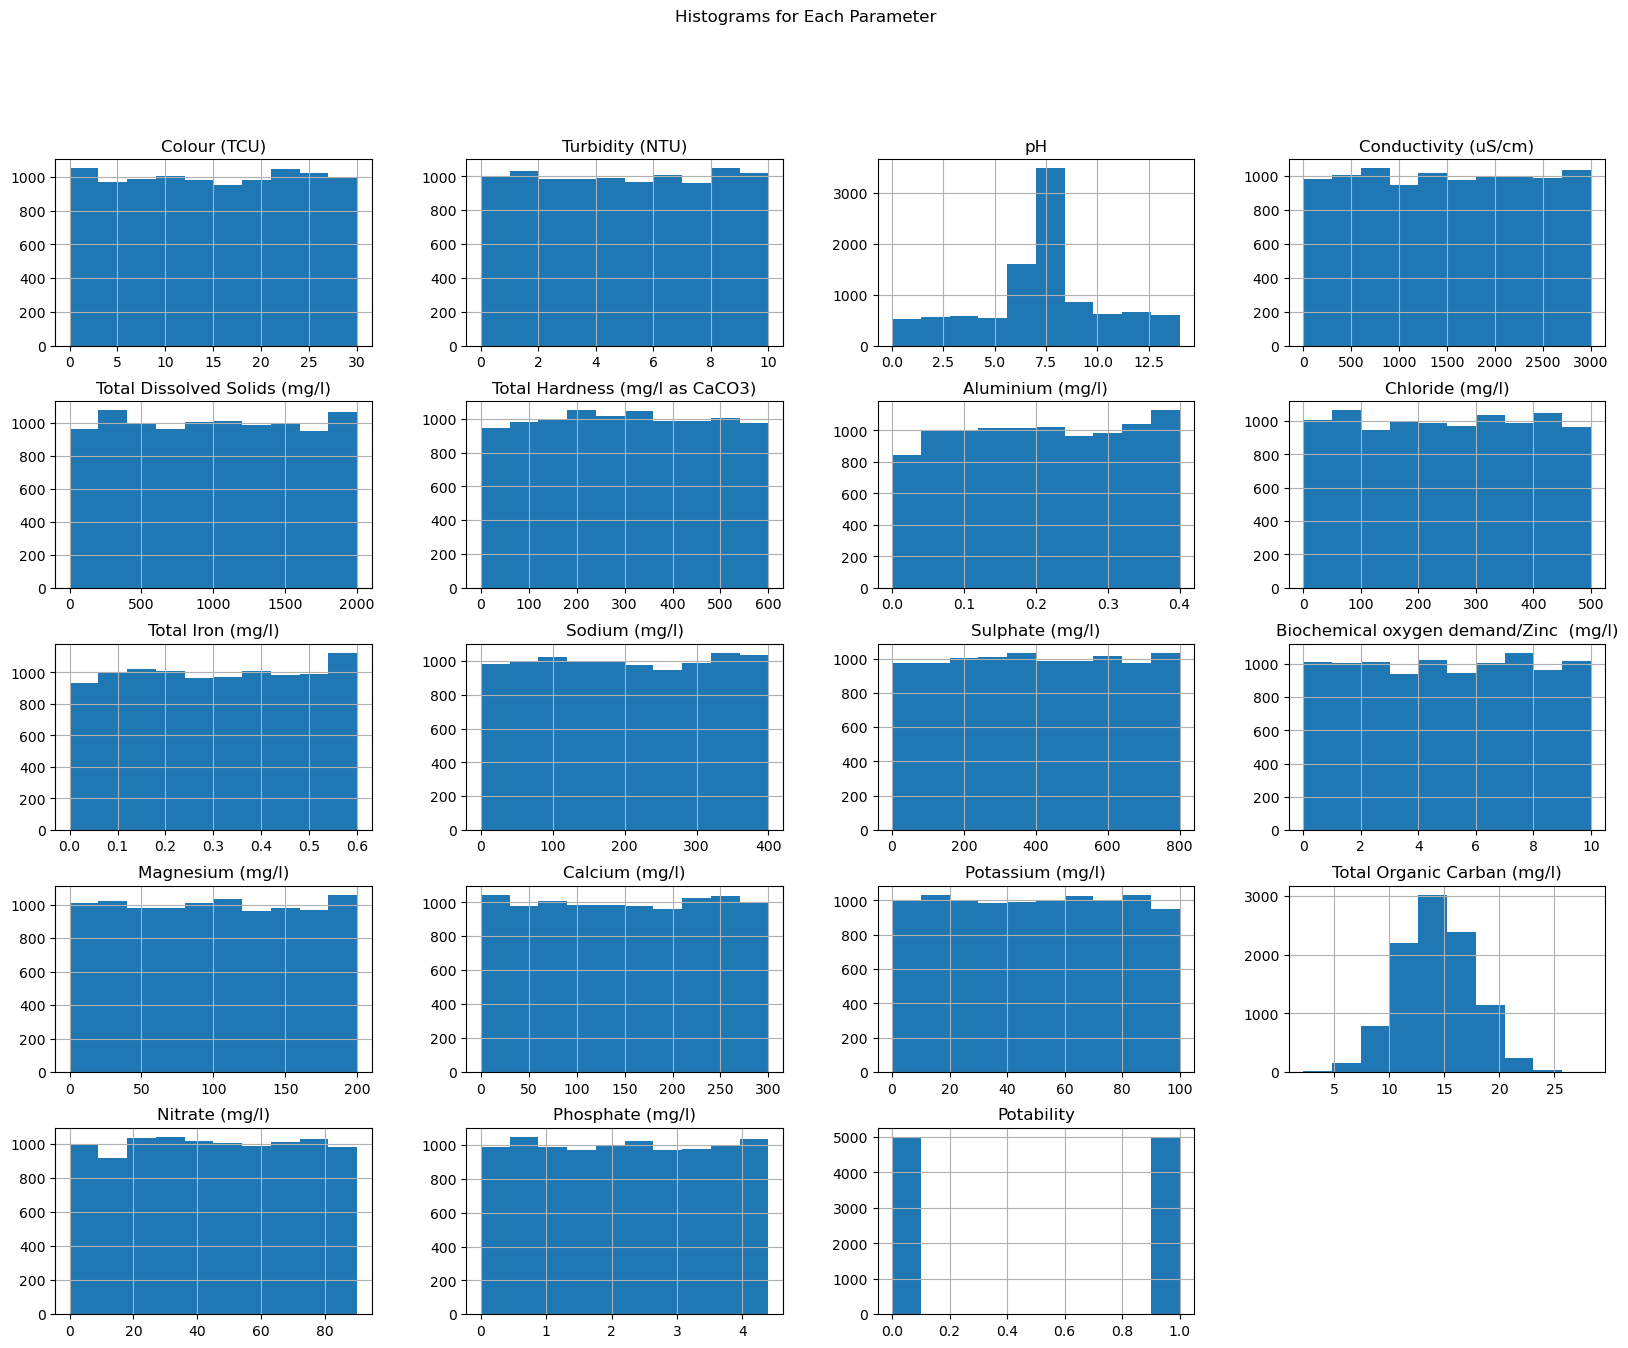

In [11]:
df.hist(figsize=(20, 15))
plt.suptitle("Histograms for Each Parameter")

Text(0.5, 0.98, 'Boxplots for Each Parameter')

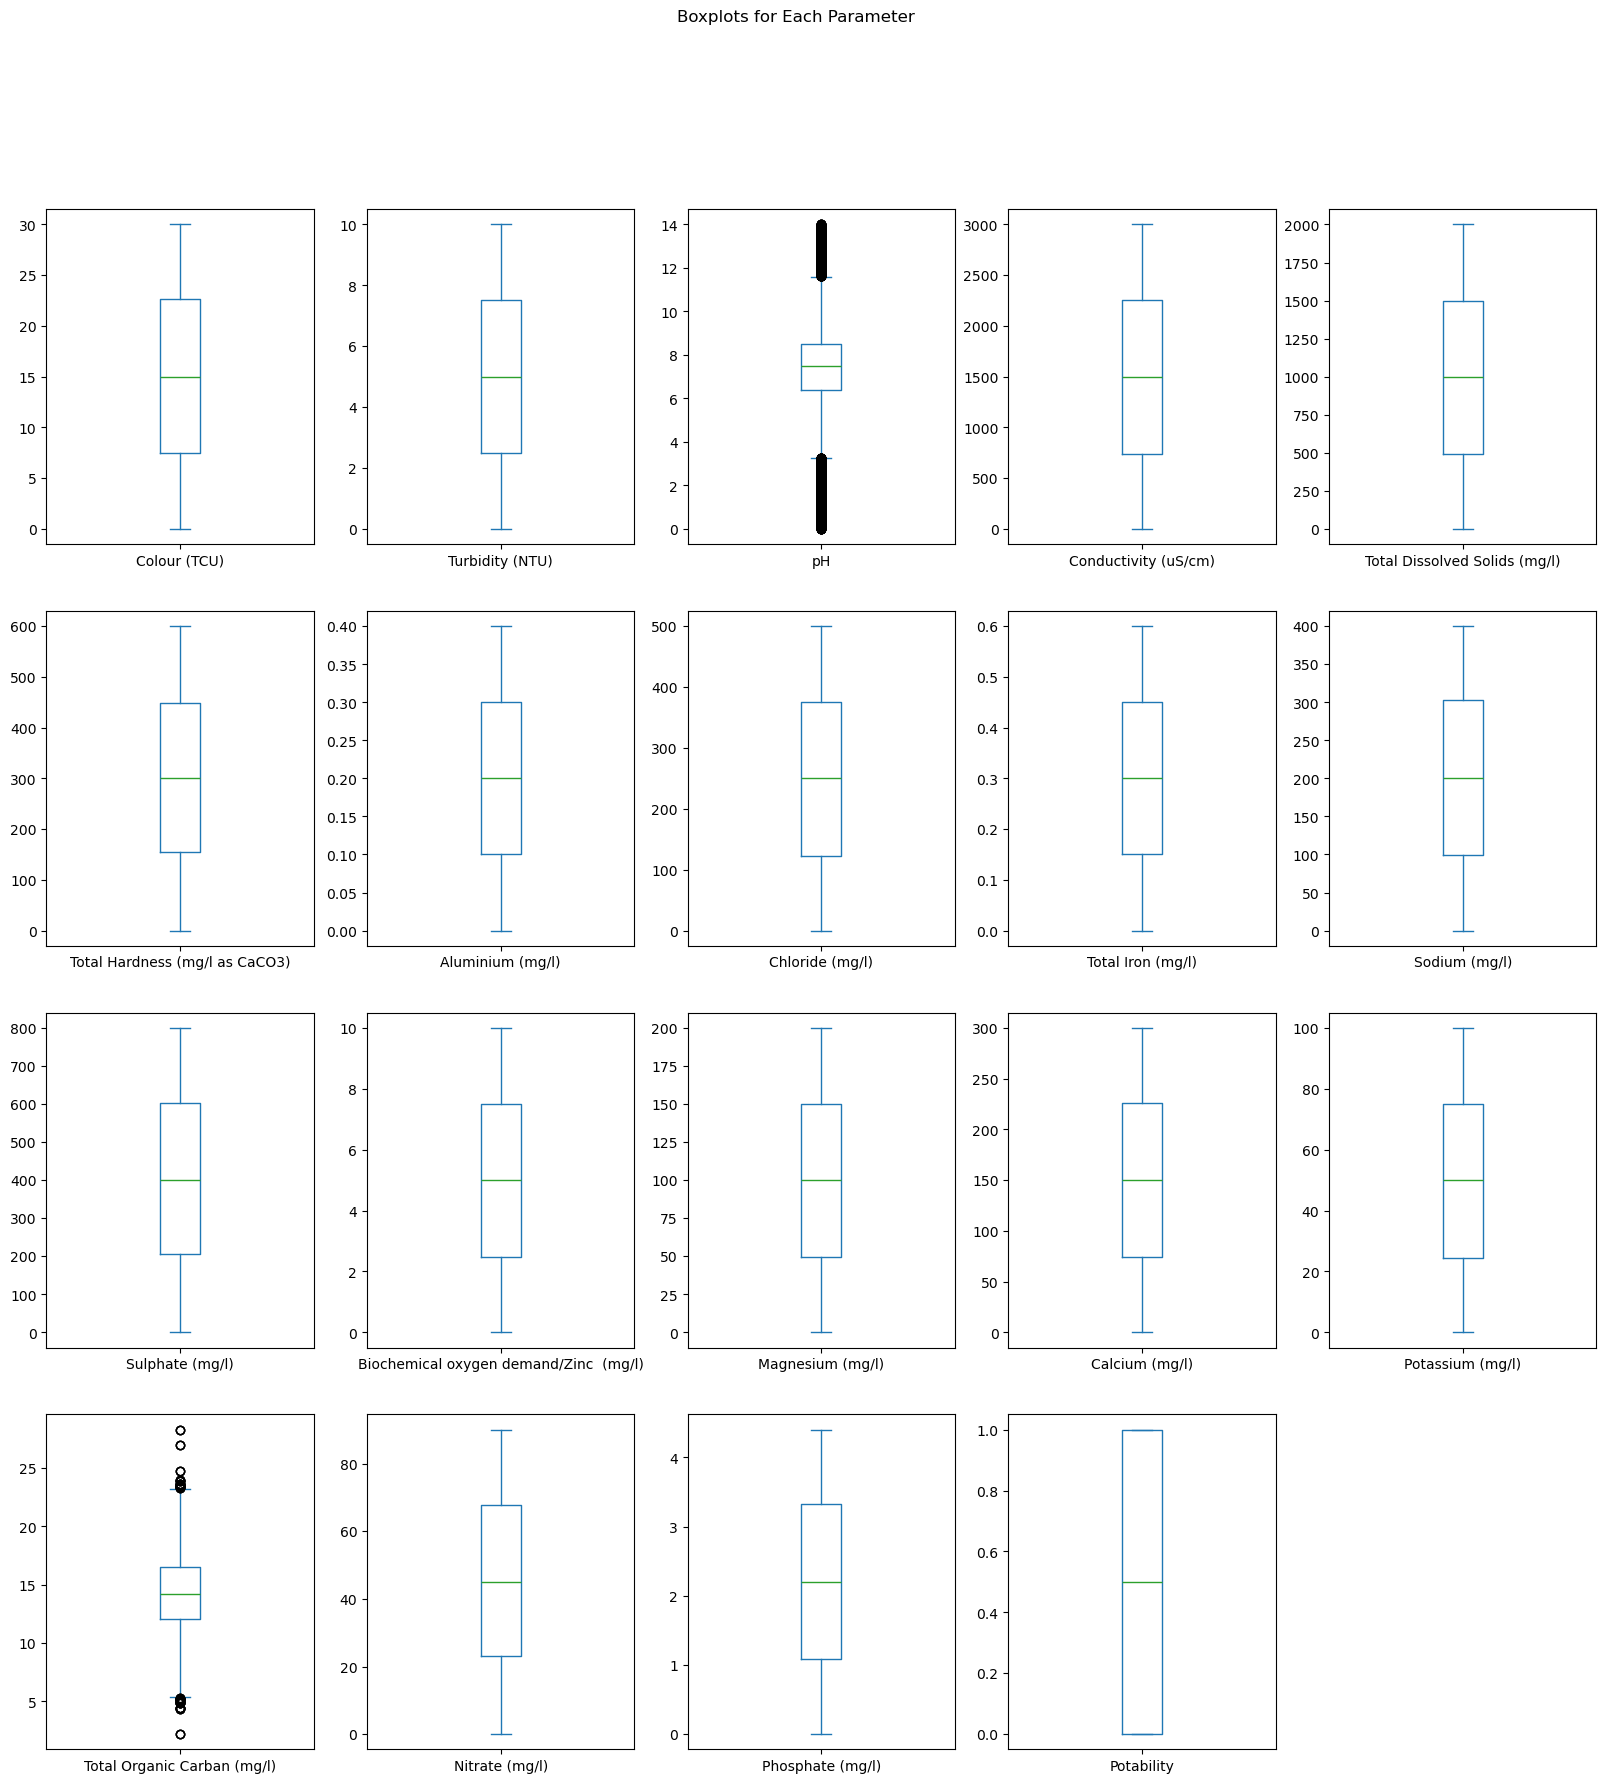

In [12]:
df.plot(
    kind="box",
    subplots=True,
    layout=(4, 5),
    figsize=(20, 20),
    sharex=True,
    sharey=False,
)
plt.suptitle("Boxplots for Each Parameter")

Text(0.5, 1.0, 'Correlation Heatmap')

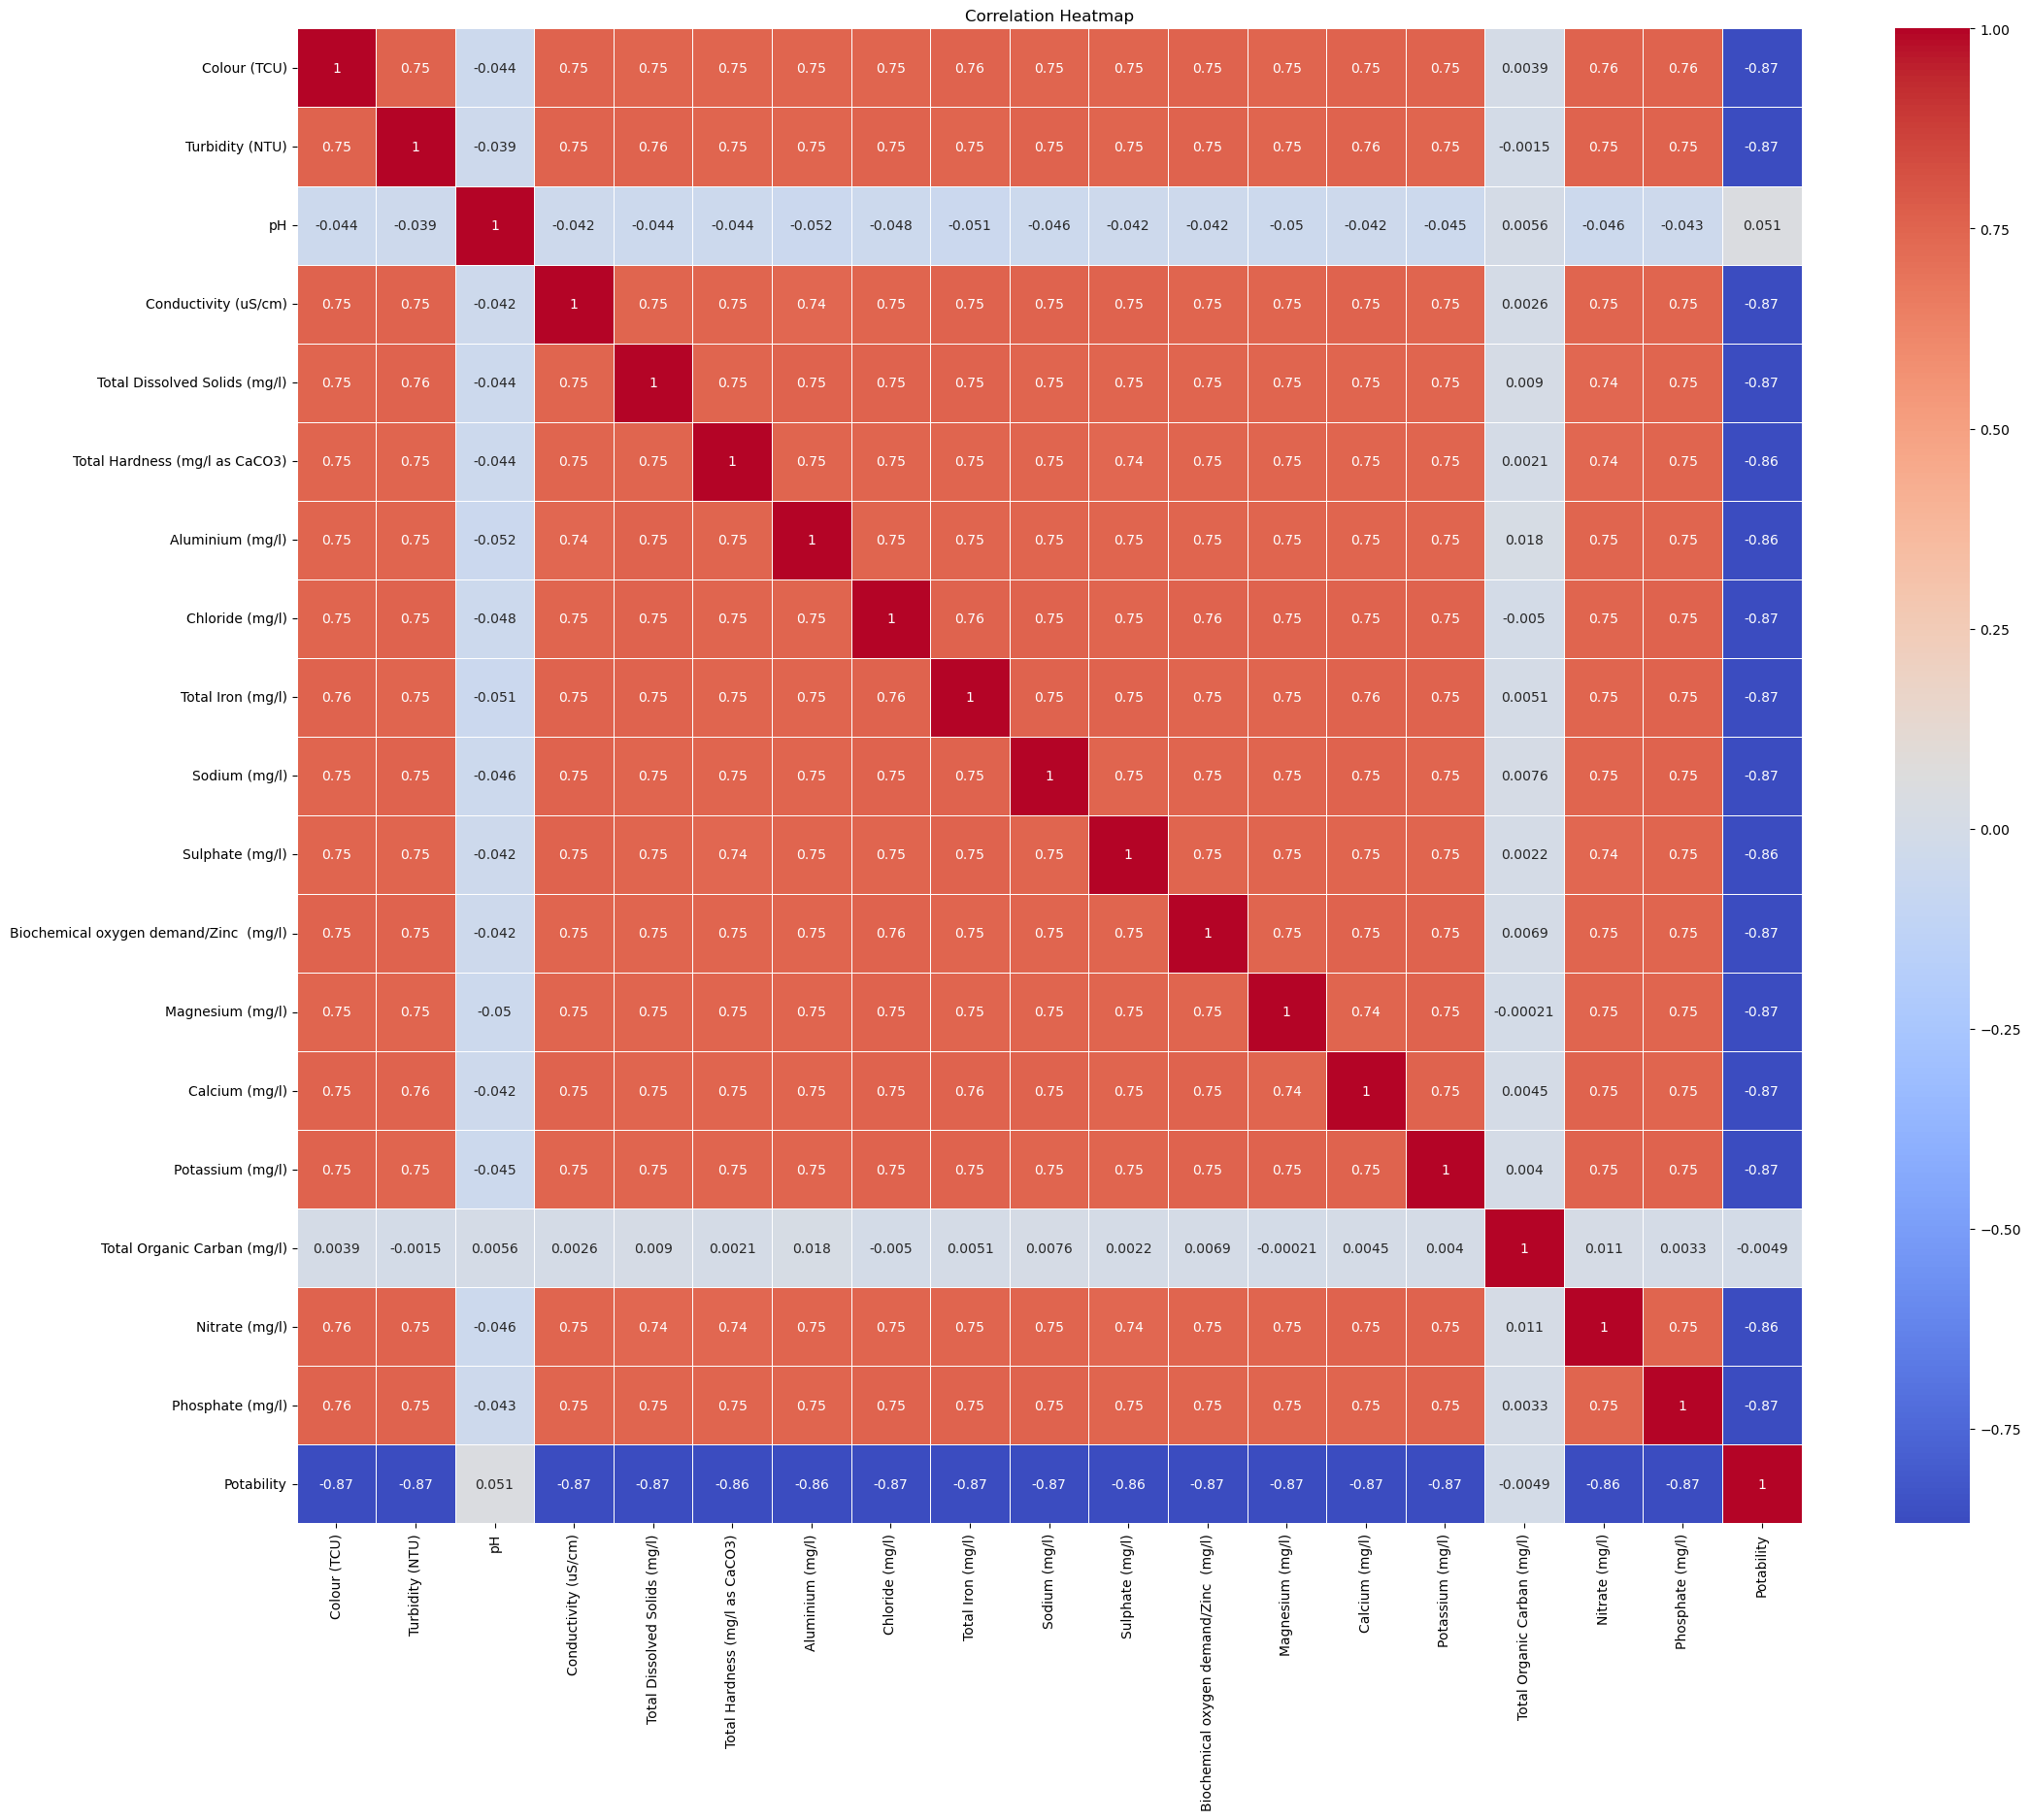

In [13]:
plt.figure(figsize=(25, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

## Finding important parameters


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
importances = model.feature_importances_
feature_names = X.columns

In [20]:
feature_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
)
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
feature_importances

,Feature,Importance
16,Nitrate (mg/l),0.110010
10,Sulphate (mg/l),0.110000
14,Potassium (mg/l),0.090050
5,Total Hardness (mg/l as CaCO3),0.090030
9,Sodium (mg/l),0.090000
4,Total Dissolved Solids (mg/l),0.090000
7,Chloride (mg/l),0.090000
3,Conductivity (uS/cm),0.080000
12,Magnesium (mg/l),0.070000
0,Colour (TCU),0.069990


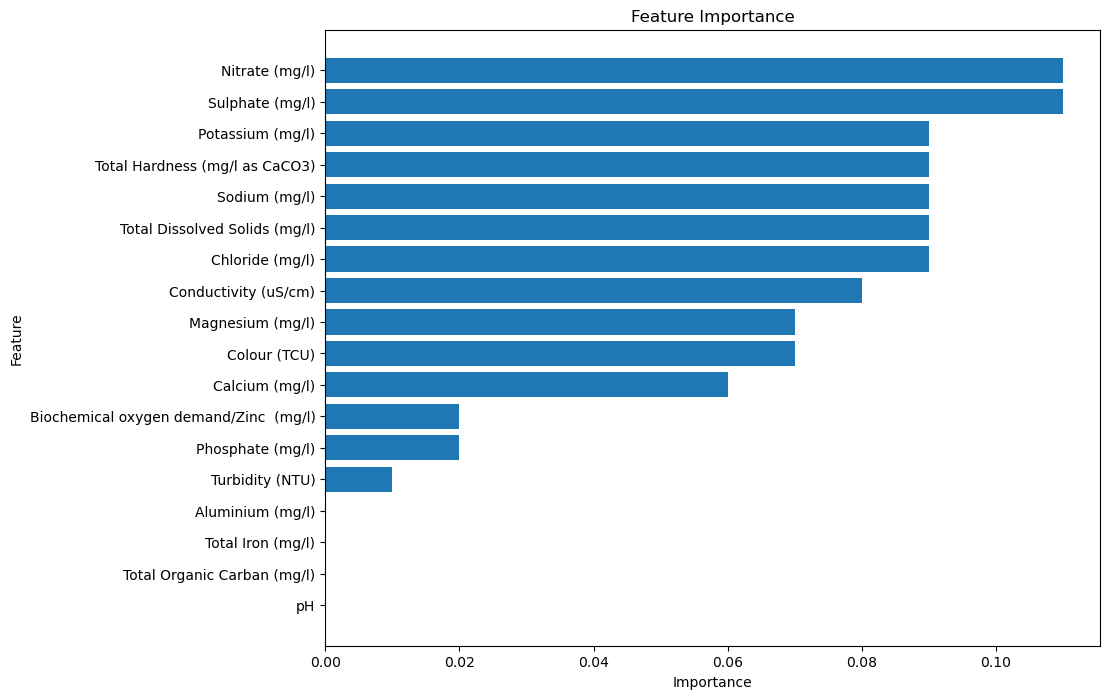

In [21]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importances["Feature"], feature_importances["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()

## Dairy industry parameters


In [22]:
# getting important parameters
importance_dict = feature_importances.set_index("Feature")["Importance"].to_dict()
importance_dict

{'Nitrate (mg/l)': 0.110009995227279,
 'Sulphate (mg/l)': 0.11000000000000001,
 'Potassium (mg/l)': 0.0900499416033473,
 'Total Hardness (mg/l as CaCO3)': 0.09002996112543975,
 'Sodium (mg/l)': 0.09000000000000001,
 'Total Dissolved Solids (mg/l)': 0.09000000000000001,
 'Chloride (mg/l)': 0.09000000000000001,
 'Conductivity (uS/cm)': 0.08000000000000002,
 'Magnesium (mg/l)': 0.07000000000000002,
 'Colour (TCU)': 0.06999000244502697,
 'Calcium (mg/l)': 0.060000000000000005,
 'Biochemical oxygen demand/Zinc  (mg/l)': 0.01998500992717573,
 'Phosphate (mg/l)': 0.01993009482618602,
 'Turbidity (NTU)': 0.009990004772721028,
 'Aluminium (mg/l)': 1.4990072824272505e-05,
 'Total Iron (mg/l)': 0.0,
 'Total Organic Carban (mg/l)': 0.0,
 'pH': 0.0}

In [23]:
thresholds = {
    "Turbidity (NTU)": lambda x: x <= 10,
    "pH": lambda x: 6.5 <= x <= 9.0,
    "Conductivity (uS/cm)": lambda x: x <= 2000,
    "Total Dissolved Solids (mg/l)": lambda x: x <= 1500,
    "Total Hardness (mg/l as CaCO3)": lambda x: x <= 500,
    "Aluminium (mg/l)": lambda x: x < 0.2,
    "Chloride (mg/l)": lambda x: x <= 250,
    "Total Iron (mg/l)": lambda x: x <= 0.3,
    "Sodium (mg/l)": lambda x: x <= 200,
    "Sulphate (mg/l)": lambda x: x <= 250,
    "Biochemical oxygen demand/Zinc  (mg/l)": lambda x: x <= 6,
    "Magnesium (mg/l)": lambda x: x <= 50,
    "Calcium (mg/l)": lambda x: x <= 100,
    "Nitrate (mg/l)": lambda x: x <= 50,
    "Phosphate (mg/l)": lambda x: x <= 0.5,
}

In [24]:
def is_usable_dairy_industry(row) -> int:
    important_parameters = [param for param, imp in importance_dict.items() if imp > 0]
    important_conditions = [
        thresholds[param](row[param])
        for param in important_parameters
        if param in thresholds
    ]
    non_important_conditions = [
        thresholds[param](row[param])
        for param in thresholds
        if param not in important_parameters
    ]

    important_satisfied_percentage = (
        sum(important_conditions) / len(important_conditions)
        if important_conditions
        else 0
    )
    non_important_satisfied_percentage = (
        sum(non_important_conditions) / len(non_important_conditions)
        if non_important_conditions
        else 0
    )

    if (
        important_satisfied_percentage == 1.0
        and non_important_satisfied_percentage == 1.0
    ):
        return 2
    elif important_satisfied_percentage > 0.9:
        return 1
    else:
        return 0

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

2024-07-23 22:31:58.968912: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 22:31:59.121540: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
df["Usable by dairy industry"] = df.apply(is_usable_dairy_industry, axis=1).astype(int)

In [27]:
df["Usable by dairy industry"].unique()

array([1, 0, 2])

In [28]:
X_dairy = df.drop(
    [
        "Usable by dairy industry",
        "Potability",
    ],
    axis=1,
)
y_dairy = to_categorical(df["Usable by dairy industry"])

X_train_dairy, X_test_dairy, y_train_dairy, y_test_dairy = train_test_split(
    X_dairy, y_dairy, test_size=0.3, random_state=42
)

In [29]:
scaler = StandardScaler()
X_train_dairy_scaled = scaler.fit_transform(X_train_dairy)
X_test_dairy_scaled = scaler.transform(X_test_dairy)

In [30]:
X_train_dairy_scaled = pd.DataFrame(X_train_dairy_scaled, columns=X_dairy.columns)
X_test_dairy_scaled = pd.DataFrame(X_test_dairy_scaled, columns=X_dairy.columns)

In [31]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_dairy_scaled.shape[1], activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/usr/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,395 (13.26 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    X_train_dairy_scaled,
    y_train_dairy,
    epochs=100,
    batch_size=10,
    validation_data=(X_test_dairy_scaled, y_test_dairy),
    callbacks=[early_stopping],  # Assuming early_stopping is defined
)

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7227 - loss: 0.6532 - val_accuracy: 0.8393 - val_loss: 0.3367
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8572 - loss: 0.3434 - val_accuracy: 0.8527 - val_loss: 0.3012
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8693 - loss: 0.3011 - val_accuracy: 0.8613 - val_loss: 0.2847
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8736 - loss: 0.2829 - val_accuracy: 0.8760 - val_loss: 0.2756
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8795 - loss: 0.2777 - val_accuracy: 0.8707 - val_loss: 0.2714
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8831 - loss: 0.2620 - val_accuracy: 0.8747 - val_loss: 0.2663
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8848 - loss: 0.2609 - val_accuracy: 0.8830 - val_loss: 0.2548
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8863 - loss: 0.2554 - val_accu

In [35]:
loss, accuracy = model.evaluate(X_test_dairy_scaled, y_test_dairy)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.1078
Test Loss: 0.1026
Test Accuracy: 0.9640


In [36]:
predictions = model.predict(X_test_dairy_scaled)
predictions

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [9.9336857e-01, 6.6314903e-03, 1.0341364e-19],
       [1.0000000e+00, 5.4264227e-08, 0.0000000e+00],
       ...,
       [9.9999774e-01, 2.3043513e-06, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [9.5491487e-01, 4.5085095e-02, 6.2016499e-12]], dtype=float32)

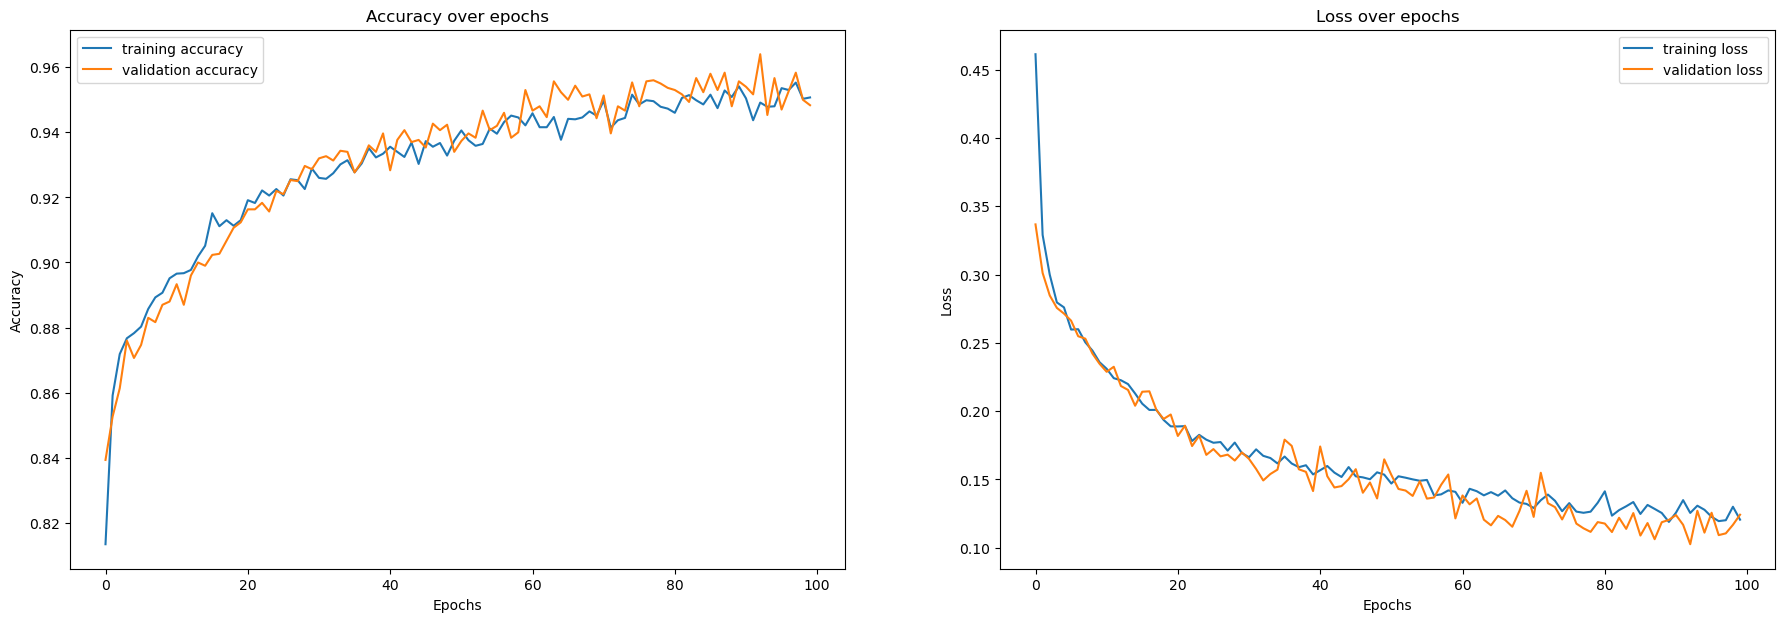

In [37]:
plt.figure(figsize=(22, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.legend()

## Saving the model


In [38]:
joblib.dump(scaler, "scaler.save")

['scaler.save']

In [39]:
model.save("water_usable_by_dairy_industry.keras")